In [1]:
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

# Get the absolute path of the current folder
abspath_curr = '/content/drive/My Drive/Colab Notebooks/'


Mounted at /content/drive


In [2]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [3]:
Hies_data = pd.read_stata(abspath_curr + '/data/PSLM_HIES/310_HIES201819_Rescaledbyhhsize_24618obs.dta')
print(Hies_data.head())

   codep  codepd  codepdd  codepddr  codepddrp    codepddrph Province  \
0      1     105     1052     10520  105201001  1.052010e+10       KP   
1      1     105     1052     10520  105201001  1.052010e+10       KP   
2      1     105     1052     10520  105201001  1.052010e+10       KP   
3      1     105     1052     10520  105201001  1.052010e+10       KP   
4      1     105     1052     10520  105201001  1.052010e+10       KP   

   Division District  rural  ...  F_ninterormore  F_nhighlorless  \
0  Malakand  Chitral  urban  ...               3               4   
1  Malakand  Chitral  urban  ...               3               6   
2  Malakand  Chitral  urban  ...               4               3   
3  Malakand  Chitral  urban  ...               0               3   
4  Malakand  Chitral  urban  ...               3               4   

   F_nhighlormore  F_nnolaborinfo  F_nemployed  F_nseeking  \
0               2               0            3           5   
1               0           

In [4]:
!pip install pyreadstat
import pyreadstat

# Assuming you have a Stata dataset file named 'your_data.dta'
df, meta = pyreadstat.read_dta(abspath_curr + '/data/PSLM_HIES/310_HIES201819_Rescaledbyhhsize_24618obs.dta')

# Access variable labels from the metadata
variable_labels = meta.column_labels

# Print variable labels
for i, var_label in enumerate(variable_labels):
    var_name = df.columns[i]
    print(f"Variable: {var_name}, Label: {var_label}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 13.8 MB/s eta 0:00:00
Variable: codep, Label: None
Variable: codepd, Label: None
Variable: codepdd, Label: None
Variable: codepddr, Label: None
Variable: codepddrp, Label: None
Variable: codepddrph, Label: None
Variable: Province, Label: None
Variable: Division, Label: None
Variable: District, Label: None
Variable: rural, Label: Rural indicator
Variable: hhcode, Label: Unique Household Identifier
Variable: commondist, Label: None
Variable: zeroes, Label: None
Variable: peaexpM, Label: Per equiv adult expend of hh adjusted by psuindex
Variable: lnexpM, Label: Dependent variable (lnexpM=ln(peaexpM))
Variable: lnskewexpM, Label: ln(peaexpM-1264.814)
Variable: bcexpM, Label: (peaexpM^-.4860963-1)/-.4860963
Variable: bclnexpM, Label: (lnexpM^-3.24538-1)/-3.24538
Variable: sample2, Label: None
Variable: sample5, Label: None
Variable: sample10, Label: None
Variable: one, Label: None
Variable: pcprov05, Label: None
Variable: pcprov10, La

In [5]:
Pslm_data = pd.read_stata(abspath_curr + '/data/PSLM_HIES/310_PSLM201920_Rescaledbyhhsize_160654obs.dta')
Pslm_data.head()

,codep,codepd,codepdd,codepddr,codepddrp,codepddrph,Province,Division,District,rural,...,F_ninterormore,F_nhighlorless,F_nhighlormore,F_nnolaborinfo,F_nemployed,F_nseeking,F_nseniornonpensioned,F_pensioned,F_2ormoreemployed,F_0employed
0,4,401,4013,40130,401302004,4.013020e+10,Balochistan,Kalat,Awaran,urban,...,3,6,0,0,4,1,0,1,1,0
1,4,401,4013,40130,401302004,4.013020e+10,Balochistan,Kalat,Awaran,urban,...,0,2,0,0,5,4,0,4,1,0
2,4,401,4013,40130,401302004,4.013020e+10,Balochistan,Kalat,Awaran,urban,...,0,4,0,0,1,0,0,0,0,0
3,4,401,4013,40130,401302004,4.013020e+10,Balochistan,Kalat,Awaran,urban,...,3,3,1,0,4,3,0,3,1,0
4,4,401,4013,40130,401302004,4.013020e+10,Balochistan,Kalat,Awaran,urban,...,0,2,0,0,4,3,0,3,1,0


In [13]:
Pslm_data['popwt']

0         1481.977539
1         1481.977539
2          846.844299
3         1693.688599
4         1481.977539
             ...     
160649    2399.060547
160650    2095.615234
160651    1191.542236
160652    1787.313354
160653    2801.316650
Name: popwt, Length: 160654, dtype: float32

In [7]:
# Assuming you have a Stata dataset file named 'your_data.dta'
df, meta = pyreadstat.read_dta(abspath_curr + '/data/PSLM_HIES/310_PSLM201920_Rescaledbyhhsize_160654obs.dta')

# Access variable labels from the metadata
variable_labels = meta.column_labels

# Print variable labels
for i, var_label in enumerate(variable_labels):
    var_name = df.columns[i]
    print(f"Variable: {var_name}, Label: {var_label}")

Variable: codep, Label: None
Variable: codepd, Label: None
Variable: codepdd, Label: None
Variable: codepddr, Label: None
Variable: codepddrp, Label: None
Variable: codepddrph, Label: None
Variable: Province, Label: None
Variable: Division, Label: None
Variable: District, Label: None
Variable: rural, Label: Rural indicator
Variable: hhcode, Label: Unique Household Identifier
Variable: commondist, Label: None
Variable: zeroes, Label: None
Variable: peaexpM, Label: Per equiv adult expend of hh adjusted by psuindex
Variable: lnexpM, Label: Dependent variable (lnexpM=ln(peaexpM))
Variable: lnskewexpM, Label: ln(peaexpM-1264.814)
Variable: bcexpM, Label: (peaexpM^-.4860963-1)/-.4860963
Variable: bclnexpM, Label: (lnexpM^-3.24538-1)/-3.24538
Variable: sample2, Label: None
Variable: sample5, Label: None
Variable: sample10, Label: None
Variable: one, Label: None
Variable: pcprov05, Label: None
Variable: pcprov10, Label: None
Variable: pcprov15, Label: None
Variable: pcprov20, Label: None
Varia

## Summary of PSLM and HIES


In [14]:
variables_list1 = [
    "W_dkw_inspiped",
    "W_dkw_inshandpump",
    "W_dkw_insmotorpump",
    "W_dkw_insclosedwell",
    "W_dkw_insopenwell",
    "W_dkw_insprotsprng",
    "W_dkw_insunprsprng",
    "W_dkw_outpiped",
    "W_dkw_outhandpump",
    "W_dkw_outmotorpump",
    "W_dkw_outclosedwell",
    "W_dkw_outopenwell",
    "W_dkw_outprotsprng",
    "W_dkw_outunprsprng",
    "W_dkw_pond",
    "W_dkw_bottwater",
    "W_dkw_tanker",
    "W_dkw_filtration",
    "W_dkw_other",
    "W_toilet_notoilet",
    "W_toilet_flushpub",
    "W_toilet_flushtank",
    "W_toilet_flushpit",
    "W_toilet_flushopen",
    "W_toilet_raiselat",
    "W_toilet_pitlat",
    "W_toilet_other",
    "W_toiletshared",
    "W_toiletprivate",
    "H_cooking_firewood",
    "H_cooking_gas",
    "H_cooking_lpg",
    "H_cooking_dung",
    "H_cooking_crop",
    "H_cooking_other",
    "H_floor_earth",
    "H_floor_ceramic",
    "H_floor_cement",
    "H_floor_bricks",
    "H_floor_other",
    "H_roof_rccrbc",
    "H_roof_wood",
    "H_roof_sheet",
    "H_roof_grader",
    "H_roof_other",
    "H_walls_burntbricks",
    "H_walls_mudbricks",
    "H_walls_wood",
    "H_walls_stones",
    "H_walls_other",
    "D_iradio",
    "D_itelevsion",
    "D_ilcdled",
    "D_irefrigerator",
    "D_ifreezer",
    "D_iwashing",
    "D_idryer",
    "D_iairconditioning",
    "D_iaircooler",
    "D_ifan",
    "D_istove",
    "D_icookingrange",
    "D_imicrowave",
    "D_isewingmachine",
    "D_iknitting",
    "D_iiron",
    "D_iwaterfilter",
    "D_idonkeypump",
    "D_iturbine",
    "D_ichair",
    "D_itable",
    "D_iups",
    "D_igenerator",
    "D_isolarpanel",
    "D_iheater",
    "D_igeaser",
    "D_ibicycle",
    "D_imotorcyclescotter",
    "D_irichshaw",
    "D_icar",
    "D_ivantruckbus",
    "D_iboat",
    "D_itractortralloy",
    "D_iclock"
]

# Assuming 'weights' is the column in your DataFrame that contains the survey weights
weights_pslm = Pslm_data['popwt']
weights_hies = Hies_data['popwt_f']

selected_variables_pslm = Pslm_data[variables_list1]
selected_variables_hies = Hies_data[variables_list1]

# Calculate weighted means and standard deviations for PSLM data
weighted_means_pslm = np.average(selected_variables_pslm, weights=weights_pslm, axis=0)
weighted_std_pslm = np.sqrt(np.average((selected_variables_pslm - weighted_means_pslm)**2, weights=weights_pslm, axis=0))

# Calculate weighted means and standard deviations for HIES data
weighted_means_hies = np.average(selected_variables_hies, weights=weights_hies, axis=0)
weighted_std_hies = np.sqrt(np.average((selected_variables_hies - weighted_means_hies)**2, weights=weights_hies, axis=0))

# Count the number of missing values for each variable
missing_values_pslm = selected_variables_pslm.isna().sum()
missing_values_hies = selected_variables_hies.isna().sum()

# Create a summary DataFrame
Summary_data = pd.DataFrame({
    'Weighted Mean PSLM': weighted_means_pslm,
    'Weighted Std PSLM': weighted_std_pslm,
    'Missing Values PSLM': missing_values_pslm,
    'Weighted Mean HIES': weighted_means_hies,
    'Weighted Std HIES': weighted_std_hies,
    'Missing Values HIES': missing_values_hies
}, index=variables_list1)

print(Summary_data)

                     Weighted Mean PSLM  Weighted Std PSLM  \
W_dkw_inspiped                 0.188993           0.391503   
W_dkw_inshandpump              0.179021           0.383370   
W_dkw_insmotorpump             0.277011           0.447522   
W_dkw_insclosedwell            0.012176           0.109670   
W_dkw_insopenwell              0.006802           0.082194   
...                                 ...                ...   
D_icar                         0.062710           0.242440   
D_ivantruckbus                 0.009387           0.096431   
D_iboat                        0.000640           0.025297   
D_itractortralloy              0.027484           0.163488   
D_iclock                       0.609786           0.487798   

                     Missing Values PSLM  Weighted Mean HIES  \
W_dkw_inspiped                         0            0.172982   
W_dkw_inshandpump                      0            0.181647   
W_dkw_insmotorpump                     0            0.296236   

## PCA for PSLM

In [17]:
weights = Pslm_data['popwt']
# Extract the selected columns
selected_variables = Pslm_data[variables_list1].copy()

# Drop rows with missing values
selected_variables = selected_variables.dropna()

# Perform Min-Max scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(selected_variables)

# Apply survey weights
weighted_data = scaled_data * np.sqrt(weights)[:, np.newaxis]

# Perform PCA
pca = PCA(n_components=1)
asset_index = pca.fit_transform(weighted_data)

# Print the explained variance
print('PCA variance explained: %.2f%%' % (100 * pca.explained_variance_ratio_[0]))

# Create the basis vector DataFrame
basis_vector = pd.DataFrame({'Asset': variables_list1, 'Magnitude': pca.components_[0]})

# Sort the basis vector by magnitude in descending order
basis_vector = basis_vector.sort_values(by='Magnitude', ascending=False)

# Save the basis vector to a CSV file
basis_vector.to_csv('asset_index_PSLM_basis_vector.csv', index=False)

# Add the wealth index as a new column in your DataFrame
Pslm_data['Wealth_Index1'] = asset_index

# Save the updated DataFrame with the wealth index to a new CSV file
Pslm_data.to_csv('PSLM_data_with_wealth_index.csv', index=False)

<ipython-input-17-b8bd748dcb65>:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  weighted_data = scaled_data * np.sqrt(weights)[:, np.newaxis]


PCA variance explained: 25.60%


In [ ]:
#from google.colab import files

#files.download('PSLM_data_with_wealth_index.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##PCA for HIES

In [18]:
weights = Hies_data['popwt_f']
# Extract the selected columns
selected_variables = Hies_data[variables_list1].copy()

# Drop rows with missing values
selected_variables = selected_variables.dropna()

# Perform Min-Max scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(selected_variables)

# Apply survey weights
weighted_data = scaled_data * np.sqrt(weights)[:, np.newaxis]

# Perform PCA
pca = PCA(n_components=1)
asset_index = pca.fit_transform(weighted_data)

# Print the explained variance
print('PCA variance explained: %.2f%%' % (100 * pca.explained_variance_ratio_[0]))

# Create the basis vector DataFrame
basis_vector = pd.DataFrame({'Asset': variables_list1, 'Magnitude': pca.components_[0]})

# Sort the basis vector by magnitude in descending order
basis_vector = basis_vector.sort_values(by='Magnitude', ascending=False)

# Save the basis vector to a CSV file
basis_vector.to_csv('asset_index_HIES_basis_vector.csv', index=False)

# Add the wealth index as a new column in your DataFrame
Hies_data['Wealth_Index1'] = asset_index

# Save the updated DataFrame with the wealth index to a new CSV file
Hies_data.to_csv('HIES_data_with_wealth_index.csv', index=False)

<ipython-input-18-257495e7673d>:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  weighted_data = scaled_data * np.sqrt(weights)[:, np.newaxis]


PCA variance explained: 25.11%


## Distribution of a wealth index estimated in the HIES and PLSM

In [19]:
hies_data = pd.read_csv('PSLM_data_with_wealth_index.csv')
pslm_data = pd.read_csv('HIES_data_with_wealth_index.csv')


# Function to calculate distribution statistics of the wealth index
def calculate_distribution_statistics(data, wealth_index_column='Wealth_Index1', group_by_columns=None):
    if group_by_columns:
        grouped_data = data.groupby(group_by_columns)
        statistics = grouped_data[wealth_index_column].agg(['mean', 'std', 'median', 'quantile'])
    else:
        statistics = data[wealth_index_column].agg(['mean', 'std', 'median', 'quantile']).to_frame().transpose()
    return statistics

# Calculate distribution statistics for HIES dataset
hies_national_stats = calculate_distribution_statistics(hies_data)
hies_urban_rural_stats = calculate_distribution_statistics(hies_data, group_by_columns='rural')
hies_province_stats = calculate_distribution_statistics(hies_data, group_by_columns='Province')
hies_urban_rural_province_stats = calculate_distribution_statistics(hies_data, group_by_columns=['Province', 'rural'])

# Calculate distribution statistics for PSLM dataset
pslm_national_stats = calculate_distribution_statistics(pslm_data)
pslm_urban_rural_stats = calculate_distribution_statistics(pslm_data, group_by_columns='rural')
pslm_province_stats = calculate_distribution_statistics(pslm_data, group_by_columns='Province')
pslm_urban_rural_province_stats = calculate_distribution_statistics(pslm_data, group_by_columns=['Province', 'rural'])

# Display the results for HIES dataset
hies_national_stats, hies_urban_rural_stats, hies_province_stats, hies_urban_rural_province_stats


(                       mean        std    median  quantile
 Wealth_Index1 -7.246338e-15  57.033203 -5.735145 -5.735145,
             mean        std     median   quantile
 rural                                            
 rural -17.286529  48.756143 -24.874616 -24.874616
 urban  38.276474  55.361677  36.220478  36.220478,
                   mean        std     median   quantile
 Province                                               
 Balochistan -42.282122  37.144642 -54.281374 -54.281374
 KP           -9.205018  50.865400 -18.325576 -18.325576
 Punjab       16.428473  56.180256  12.536480  12.536480
 Sindh       -10.805074  56.984513 -16.283876 -16.283876,
                         mean        std     median   quantile
 Province    rural                                            
 Balochistan rural -50.335694  30.348568 -59.470153 -59.470153
             urban  -6.747449  43.071952 -12.097627 -12.097627
 KP          rural -16.239301  45.181427 -23.944986 -23.944986
             urb

## Harmonizing wealth indices

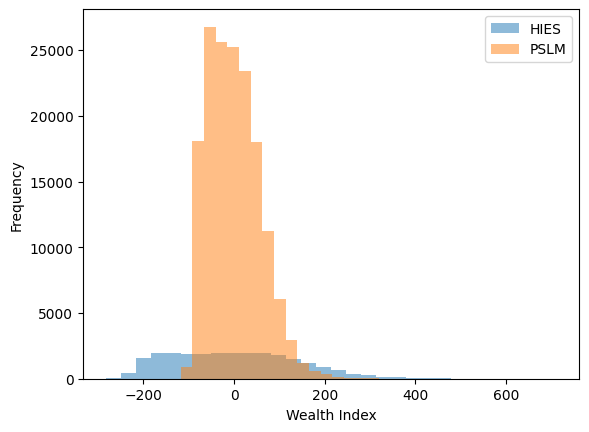

In [20]:
# Calculate descriptive statistics
mean_HIES = np.mean(Hies_data['Wealth_Index1'])
std_HIES = np.std(Hies_data['Wealth_Index1'])

mean_PSLM = np.mean(Pslm_data['Wealth_Index1'])
std_PSLM = np.std(Pslm_data['Wealth_Index1'])

# Visual inspection (histograms)
import matplotlib.pyplot as plt

plt.hist(Hies_data['Wealth_Index1'], bins=30, alpha=0.5, label='HIES')
plt.hist(Pslm_data['Wealth_Index1'], bins=30, alpha=0.5, label='PSLM')
plt.legend(loc='upper right')
plt.xlabel('Wealth Index')
plt.ylabel('Frequency')
plt.show()

# Assuming HIES_data and PSLM_data are pandas DataFrames
# Align the data to have the same length
min_length = min(len(Hies_data), len(Pslm_data))
HIES_data = Hies_data.iloc[:min_length]
PSLM_data = Pslm_data.iloc[:min_length]


In [25]:
import pandas as pd

# Load the PSLM and HIES data with wealth indices
pslm_data = pd.read_csv('PSLM_data_with_wealth_index.csv')
hies_data = pd.read_csv('HIES_data_with_wealth_index.csv')

# Add survey weights
pslm_data['weights'] = pslm_data['popwt']
hies_data['weights'] = hies_data['popwt_f']

# Calculate weighted means and standard deviations for wealth indices
weighted_mean_pslm = (pslm_data['Wealth_Index1'] * pslm_data['weights']).sum() / pslm_data['weights'].sum()
weighted_std_pslm = ((pslm_data['Wealth_Index1'] - weighted_mean_pslm)**2 * pslm_data['weights']).sum() / pslm_data['weights'].sum()

weighted_mean_hies = (hies_data['Wealth_Index1'] * hies_data['weights']).sum() / hies_data['weights'].sum()
weighted_std_hies = ((hies_data['Wealth_Index1'] - weighted_mean_hies)**2 * hies_data['weights']).sum() / hies_data['weights'].sum()

# Standardize wealth indices within each dataset
pslm_data['Wealth_Index_PSLM_Standardized'] = (pslm_data['Wealth_Index1'] - weighted_mean_pslm) / weighted_std_pslm
hies_data['Wealth_Index_HIES_Standardized'] = (hies_data['Wealth_Index1'] - weighted_mean_hies) / weighted_std_hies

# Calculate weighted average for harmonized wealth index
total_weights = pslm_data['weights'].sum() + hies_data['weights'].sum()
harmonized_wealth_index_pslm = (pslm_data['Wealth_Index_PSLM_Standardized'] * pslm_data['weights']) / total_weights
harmonized_wealth_index_hies = (hies_data['Wealth_Index_HIES_Standardized'] * hies_data['weights']) / total_weights

# Add the harmonized wealth index to both datasets
pslm_data['Harmonized_Wealth_Index1'] = harmonized_wealth_index_pslm
hies_data['Harmonized_Wealth_Index1'] = harmonized_wealth_index_hies

# Save the updated datasets with harmonized wealth indices
pslm_data.to_csv('PSLM_data_with_harmonized_wealth_index.csv', index=False)
hies_data.to_csv('HIES_data_with_harmonized_wealth_index.csv', index=False)



In [27]:
hies_data['Harmonized_Wealth_Index1']

0       -4.154002e-08
1       -4.428074e-08
2       -1.320527e-08
3       -5.936109e-08
4       -2.478226e-08
             ...     
24613   -1.922174e-08
24614   -2.030910e-08
24615   -4.934541e-09
24616   -1.260429e-08
24617   -1.638937e-08
Name: Harmonized_Wealth_Index1, Length: 24618, dtype: float64

## Household wealth correlates with household expenditure in HIES Data

In [23]:
from scipy.stats import spearmanr

# Load the HIES data with the wealth index
hies_data = pd.read_csv('HIES_data_with_wealth_index.csv')

# Aggregate the data at the province level
province_agg = hies_data.groupby('Province').agg({'Wealth_Index1': 'mean', 'lnexpM': 'mean'}).reset_index()

# Calculate the Spearman rank correlation
correlation, p_value = spearmanr(province_agg['Wealth_Index1'], province_agg['lnexpM'])

# Print the results
print(f"Spearman Rank Correlation at Province Level: {correlation:.2f}")
print(f"P-Value: {p_value:.4f}")

Spearman Rank Correlation at Province Level: 0.80
P-Value: 0.2000


## Comparing the RWI with the wealth index from the PSLM data

In [28]:
# Load the RWI data from the CSV file
rwi_data = pd.read_csv(abspath_curr + '/data/pak_rwi.csv')

In [29]:
districts = gpd.read_file(abspath_curr + '/data/pak_admbnda_adm2_wfp_20220909.shp')
print(districts.head())

   Shape_Leng  Shape_Area        ADM2_EN ADM2_PCODE ADM2_REF ADM2ALT1EN  \
0    1.594116    0.067758           Bagh      PK101     None       None   
1    1.987888    0.117047        Bhimber      PK102     None       None   
2    1.300416    0.066683  Jhelum Valley      PK103     None       None   
3    1.001545    0.053722         Haveli      PK104     None       None   
4    2.017824    0.155069          Kotli      PK105     None       None   

  ADM2ALT2EN       ADM1_EN ADM1_PCODE   ADM0_EN ADM0_PCODE        date  \
0       None  Azad Kashmir        PK1  Pakistan         PK  2022-09-02   
1       None  Azad Kashmir        PK1  Pakistan         PK  2022-09-02   
2       None  Azad Kashmir        PK1  Pakistan         PK  2022-09-02   
3       None  Azad Kashmir        PK1  Pakistan         PK  2022-09-02   
4       None  Azad Kashmir        PK1  Pakistan         PK  2022-09-02   

      validOn validTo                                           geometry  
0  2022-09-09    None  POLYGO

In [30]:
geometry = [Point(xy) for xy in zip(rwi_data['longitude'], rwi_data['latitude'])]
rwi_data = gpd.GeoDataFrame(rwi_data, geometry=geometry)

# Perform the spatial join to associate RWI data with districts
rwi_data_with_district = gpd.sjoin(rwi_data, districts, how="left", op="within")

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [31]:
# Filter the data to retain only the districts in Punjab, Sindh, Balochistan, KP, and Islamabad
provinces_to_include = ["Punjab", "Sindh", "Balochistan", "Khyber Pakhtunkhwa", "Islamabad"]
filtered_rwi_district_data = rwi_data_with_district[rwi_data_with_district['ADM1_EN'].isin(provinces_to_include)]

filtered_rwi_district_data.head()


,latitude,longitude,rwi,error,geometry,index_right,Shape_Leng,Shape_Area,ADM2_EN,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo
0,33.897776,70.037842,-0.074,0.624,POINT (70.03784 33.89778),77.0,3.049083,0.330521,Kurram,PK518,None,None,None,Khyber Pakhtunkhwa,PK5,Pakistan,PK,2022-09-02,2022-09-09,None
1,31.118794,66.807861,-0.569,0.368,POINT (66.80786 31.11879),44.0,2.161751,0.154244,Chaman,PK235,None,None,None,Balochistan,PK2,Pakistan,PK,2022-09-02,2022-09-09,None
2,32.648625,73.245850,-0.193,0.498,POINT (73.24585 32.64863),107.0,4.149911,0.343704,Jhelum,PK613,None,None,None,Punjab,PK6,Pakistan,PK,2022-09-02,2022-09-09,None
3,35.182788,72.894287,-0.178,0.355,POINT (72.89429 35.18279),74.0,1.571019,0.081476,Kohistan Lower,PK515,None,None,None,Khyber Pakhtunkhwa,PK5,Pakistan,PK,2022-09-02,2022-09-09,None
4,25.948166,69.268799,-0.530,0.450,POINT (69.26880 25.94817),148.0,6.550566,0.915531,Sanghar,PK718,None,None,None,Sindh,PK7,Pakistan,PK,2022-09-02,2022-09-09,None


In [32]:
# Create a mapping dictionary for district names
district_mapping = {
    'Central Karachi': 'Karachi Central',
    'Chitral Lower': 'Chitral',
    'Chitral Upper': 'Chitral',
    'D. I. Khan': 'Dera Ismail Khan',
    'East Karachi': 'Karachi East',
    'Kashmore': 'Kashmor',
    'Kohistan Lower': 'Kohistan',
    'Kohistan Upper': 'Kohistan',
    'Korangi Karachi': 'Korangi',
    'Leiah': 'Layyah',
    'Malakand': 'Malakand Protected Area',
    'Malir Karachi': 'Malir',
    'Shaheed Benazir Abad': 'Shaheed Benazirabad',
    'South Karachi': 'Karachi South',
    'Tor Ghar': 'Torghar',
    'West Karachi': 'Karachi West',
    'Shaheed Sikandarabad': 'Surab'
}

# Apply the mapping dictionary to the 'ADM2_EN' column of the filtered_rwi_district_data dataframe
filtered_rwi_district_data['ADM2_EN'] = filtered_rwi_district_data['ADM2_EN'].replace(district_mapping)


/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [33]:
district_mean_rwi = filtered_rwi_district_data.groupby('ADM2_EN')['rwi'].mean().reset_index()

# Sort the districts by RWI score in descending order
ranked_districts = district_mean_rwi.sort_values(by='rwi', ascending=False)

# Print the ranked districts
print(ranked_districts)


             ADM2_EN       rwi
43   Karachi Central  1.200615
63           Korangi  0.920591
44      Karachi East  0.893366
46      Karachi West  0.589120
33         Islamabad  0.545537
..               ...       ...
3              Badin -0.493108
116          Sujawal -0.498469
124       Tharparkar -0.511736
70             Lehri -0.532556
37        Jhal Magsi -0.586324

[134 rows x 2 columns]


In [34]:

pslm_data = pd.read_csv('PSLM_data_with_wealth_index.csv')
# Aggregating Wealth Index for PSLM
pslm_district_wealth = pslm_data.groupby('District')['Wealth_Index1'].mean().reset_index()

# Filter the RWI data to include only the common districts
common_districts = set(pslm_district_wealth['District'])
filtered_rwi_data = filtered_rwi_district_data[filtered_rwi_district_data['ADM2_EN'].isin(common_districts)]

# Aggregating RWI scores by district
rwi_district_wealth = filtered_rwi_data.groupby('ADM2_EN')['rwi'].mean()

# Ranking Districts based on wealth indices
pslm_district_ranking = pslm_district_wealth.sort_values(by='Wealth_Index1', ascending=False).reset_index(drop=True)
rwi_district_ranking = rwi_district_wealth.sort_values(ascending=False).reset_index()

# Save the rankings (optional)
pslm_district_ranking.to_csv('pslm_district_ranking.csv', index=False)
rwi_district_ranking.to_csv('rwi_district_ranking.csv', index=False)

# Calculate Spearman's rank correlation between PSLM and RWI rankings
corr_pslm_rwi, _ = spearmanr(pslm_district_ranking['Wealth_Index1'], rwi_district_ranking['rwi'])

print(f"Spearman's rank correlation between PSLM and RWI: {corr_pslm_rwi:.2f}")


Spearman's rank correlation between PSLM and RWI: 1.00


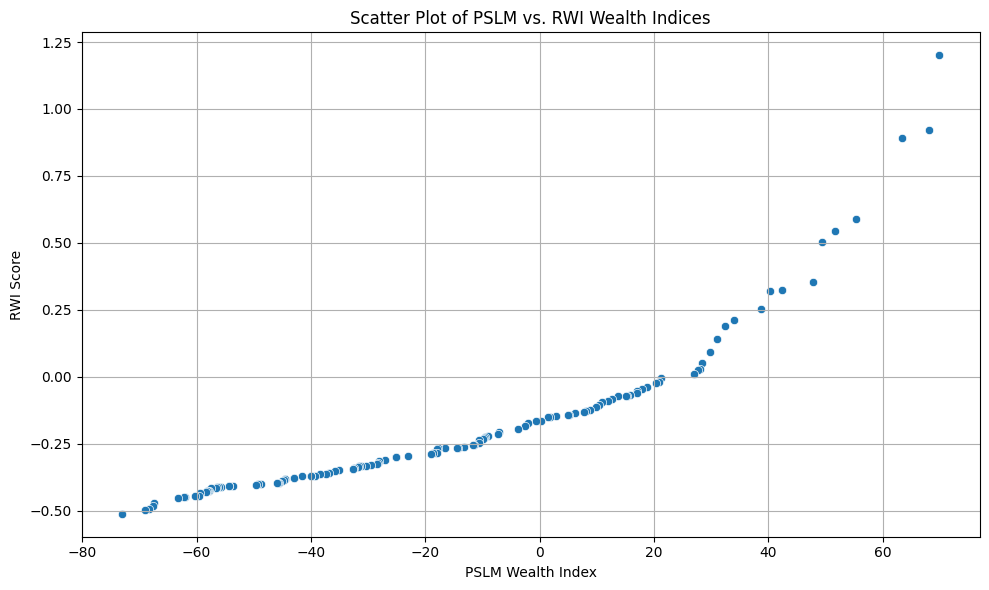

In [35]:
# 1. Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pslm_district_ranking['Wealth_Index1'], y=rwi_district_ranking['rwi'])
plt.title("Scatter Plot of PSLM vs. RWI Wealth Indices")
plt.xlabel("PSLM Wealth Index")
plt.ylabel("RWI Score")
plt.grid(True)
plt.tight_layout()
plt.show()

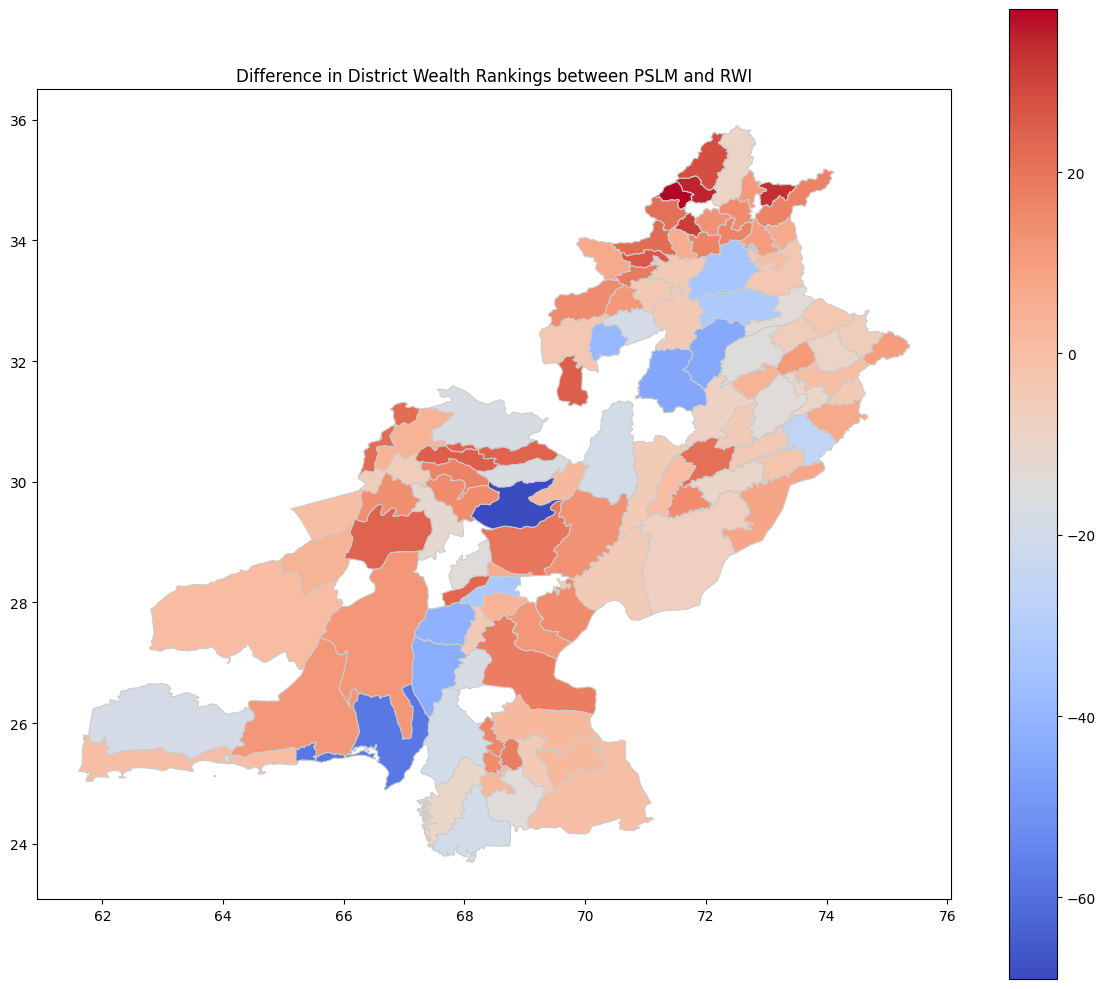

In [36]:
# 2. Heatmap (Difference between rankings)
# Assuming you have a shapefile 'districts_shapefile.shp' with district boundaries
gdf = gpd.read_file(abspath_curr + '/data/pak_admbnda_adm2_wfp_20220909.shp')

# Calculate the difference in rankings
pslm_district_ranking['PSLM Rank'] = pslm_district_ranking.index + 1
rwi_district_ranking['RWI Rank'] = rwi_district_ranking.index + 1
merged_rankings = pd.merge(pslm_district_ranking, rwi_district_ranking, left_on='District', right_on='ADM2_EN')
merged_rankings['Rank Difference'] = merged_rankings['PSLM Rank'] - merged_rankings['RWI Rank']

# Merge with the geodataframe
gdf = gdf.merge(merged_rankings, left_on='ADM2_EN', right_on='District', how='inner')

# Plotting the heatmap
fig, ax = plt.subplots(figsize=(12, 10))
gdf.plot(column='Rank Difference', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title("Difference in District Wealth Rankings between PSLM and RWI")
plt.tight_layout()
plt.show()

In [37]:
# Merge the two datasets on the district names
combined_data = pslm_district_ranking.merge(rwi_district_ranking, left_on='District', right_on='ADM2_EN')

n_bootstrap_samples = 1000
correlation_samples = []

for _ in range(n_bootstrap_samples):
    # Randomly sample districts with replacement
    sample = combined_data.sample(n=combined_data.shape[0], replace=True)

    # Calculate the correlation for this resampled data
    corr, _ = spearmanr(sample['Wealth_Index1'], sample['rwi'])
    correlation_samples.append(corr)

# Analyze bootstrap results
bootstrap_mean = np.mean(correlation_samples)
bootstrap_std = np.std(correlation_samples)
confidence_interval = np.percentile(correlation_samples, [2.5, 97.5])

print(f"Bootstrap Mean Correlation: {bootstrap_mean:.2f}")
print(f"Bootstrap Standard Deviation: {bootstrap_std:.2f}")
print(f"95% Confidence Interval: ({confidence_interval[0]:.2f}, {confidence_interval[1]:.2f})")


Bootstrap Mean Correlation: 0.81
Bootstrap Standard Deviation: 0.05
95% Confidence Interval: (0.71, 0.88)


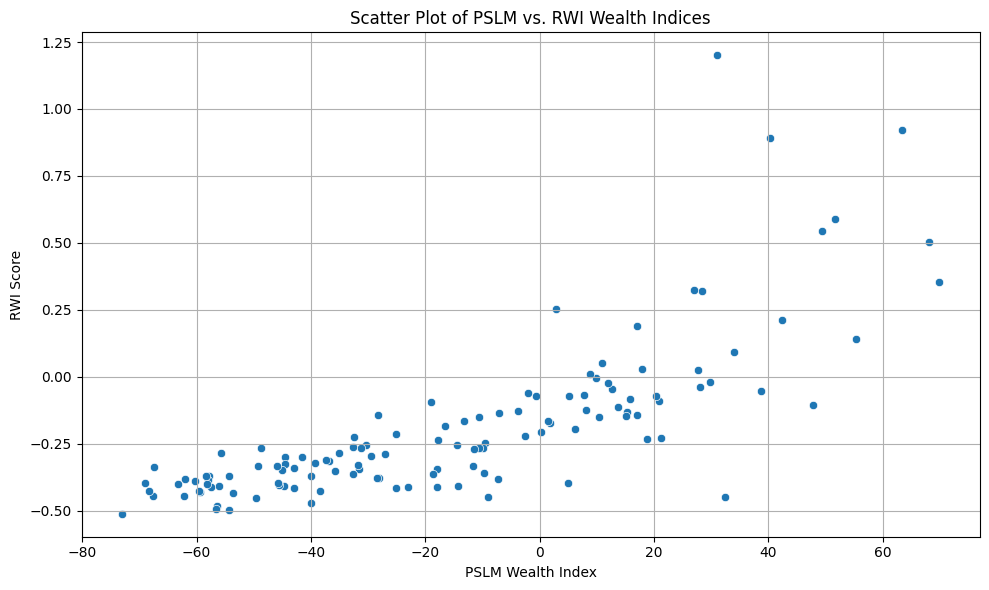

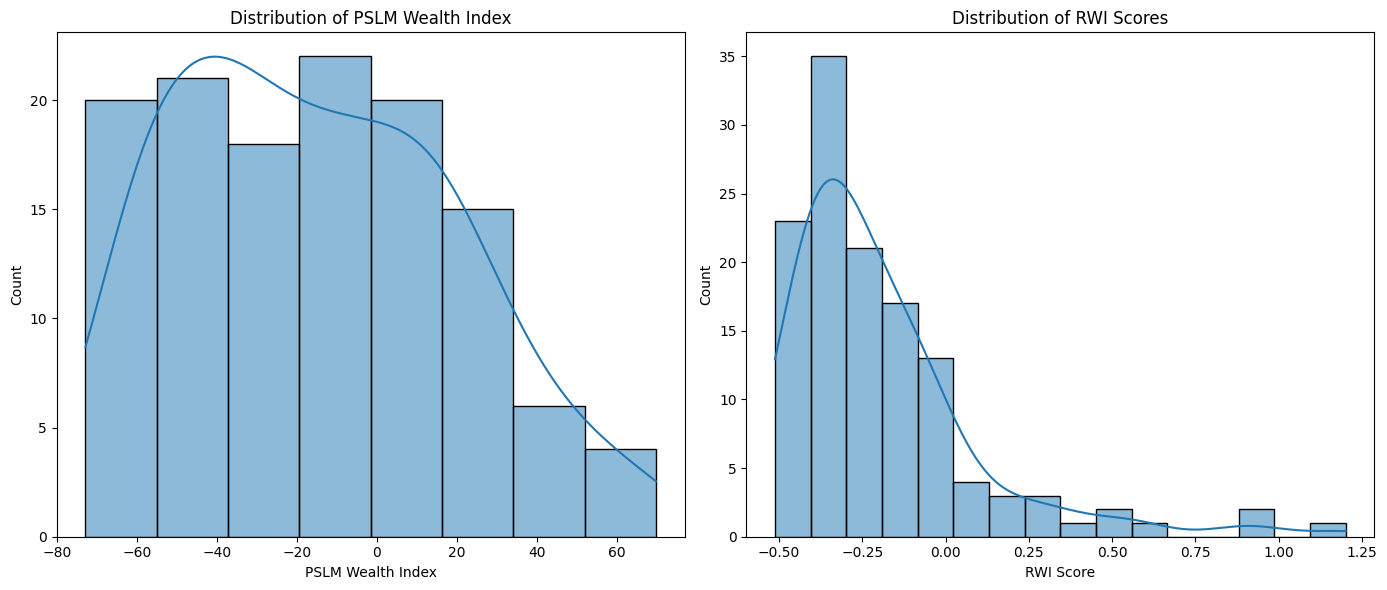

In [38]:

# Scatter plot of RWI vs PSLM scores
plt.figure(figsize=(10, 6))
sns.scatterplot(x=combined_data['Wealth_Index1'], y=combined_data['rwi'])
plt.title("Scatter Plot of PSLM vs. RWI Wealth Indices")
plt.xlabel("PSLM Wealth Index")
plt.ylabel("RWI Score")
plt.grid(True)
plt.tight_layout()
#plt.show()

plt.savefig(abspath_curr + '/data/scatter_plot.png')
plt.show()

# Histograms
plt.figure(figsize=(14, 6))

# PSLM histogram
plt.subplot(1, 2, 1)
sns.histplot(combined_data['Wealth_Index1'], kde=True)
plt.title('Distribution of PSLM Wealth Index')
plt.xlabel('PSLM Wealth Index')
plt.ylabel('Count')

# RWI histogram
plt.subplot(1, 2, 2)
sns.histplot(combined_data['rwi'], kde=True)
plt.title('Distribution of RWI Scores')
plt.xlabel('RWI Score')
plt.ylabel('Count')

plt.tight_layout()
#plt.show()


plt.savefig(abspath_curr + '/data/histplot.png')
plt.show()



## Comparing the RWI with the  Harmonized Wealth index from the PSLM data

In [39]:
pslm_data1 = pd.read_csv('PSLM_data_with_harmonized_wealth_index.csv')
# Aggregating Wealth Index for PSLM
pslm_district_wealth1 = pslm_data1.groupby('District')['Harmonized_Wealth_Index1'].mean().reset_index()

# Filter the RWI data to include only the common districts
common_districts1 = set(pslm_district_wealth1['District'])
filtered_rwi_data1 = filtered_rwi_district_data[filtered_rwi_district_data['ADM2_EN'].isin(common_districts)]

# Aggregating RWI scores by district
rwi_district_wealth1 = filtered_rwi_data1.groupby('ADM2_EN')['rwi'].mean()

# Ranking Districts based on wealth indices
pslm_district_ranking1 = pslm_district_wealth1.sort_values(by='Harmonized_Wealth_Index1', ascending=False).reset_index(drop=True)
rwi_district_ranking1 = rwi_district_wealth1.sort_values(ascending=False).reset_index()

# Save the rankings (optional)
pslm_district_ranking1.to_csv('pslm_district_ranking_with_HarmonizedWealthIndex.csv', index=False)
rwi_district_ranking1.to_csv('rwi_district_ranking_with_rwi.csv', index=False)

# Calculate Spearman's rank correlation between PSLM and RWI rankings
corr_pslm_rwi, _ = spearmanr(pslm_district_ranking1['Harmonized_Wealth_Index1'], rwi_district_ranking1['rwi'])

print(f"Spearman's rank correlation between PSLM and RWI: {corr_pslm_rwi:.2f}")

Spearman's rank correlation between PSLM and RWI: 1.00


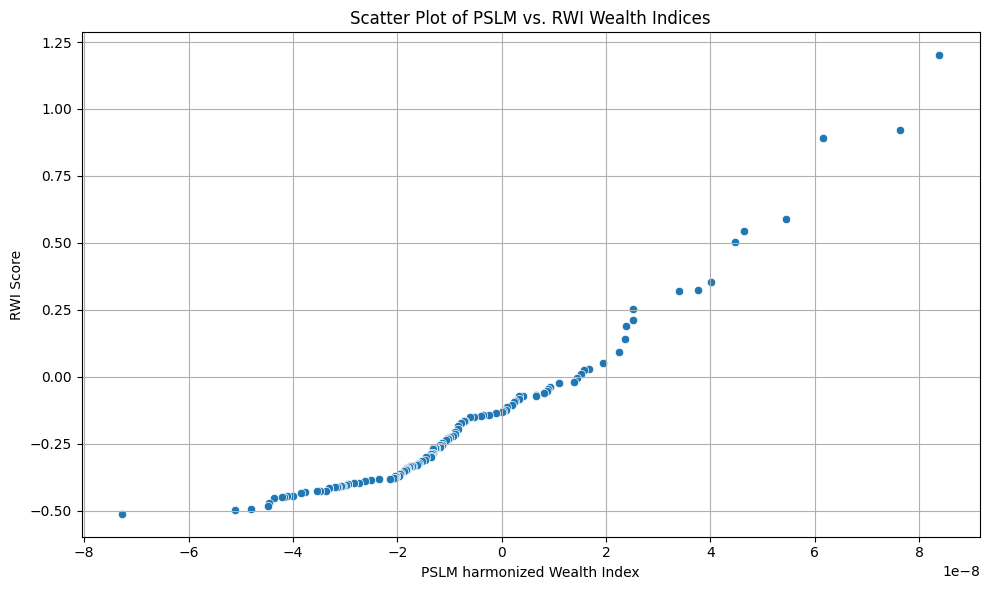

In [40]:
# 1. Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pslm_district_ranking1['Harmonized_Wealth_Index1'], y=rwi_district_ranking1['rwi'])
plt.title("Scatter Plot of PSLM vs. RWI Wealth Indices")
plt.xlabel("PSLM harmonized Wealth Index")
plt.ylabel("RWI Score")
plt.grid(True)
plt.tight_layout()
plt.show()

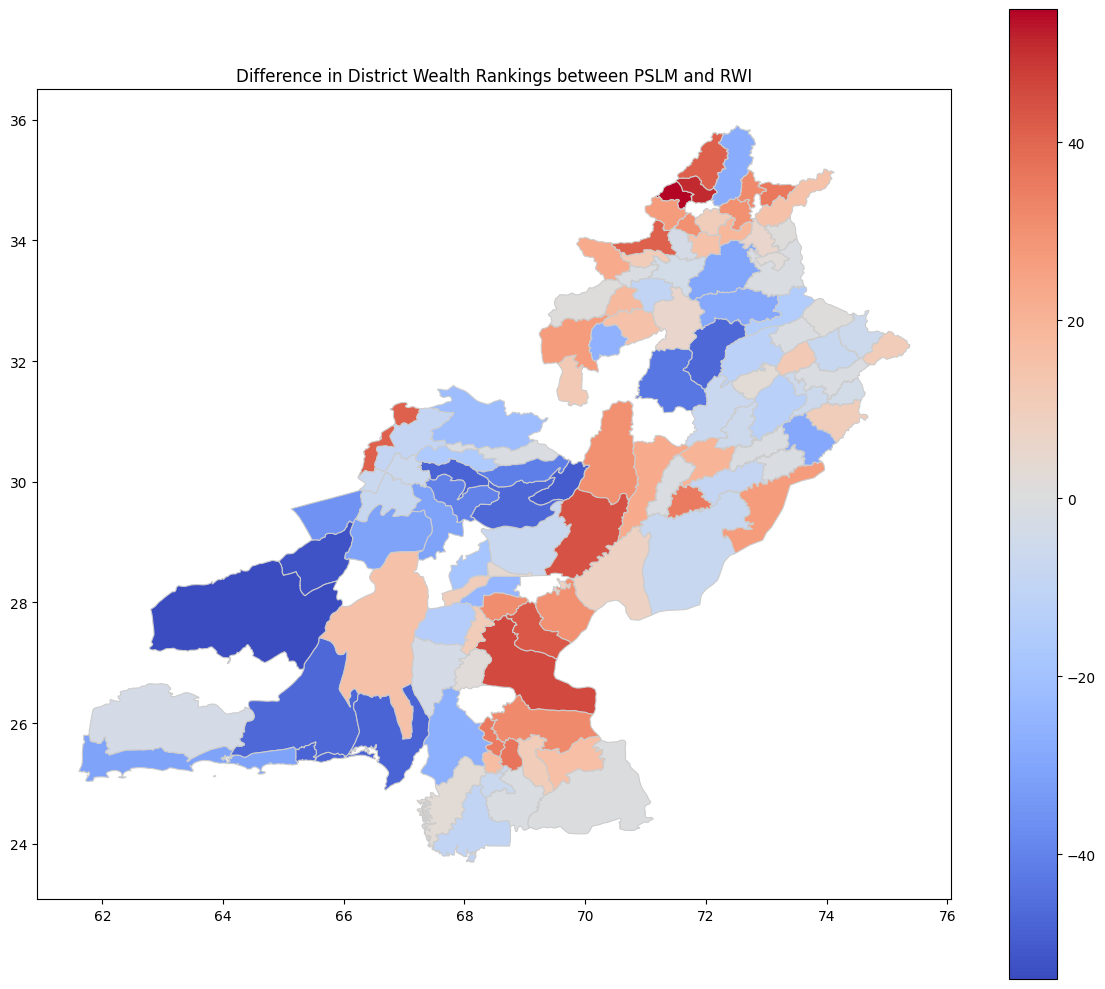

In [41]:
# 2. Heatmap (Difference between rankings)
# Assuming you have a shapefile 'districts_shapefile.shp' with district boundaries
gdf = gpd.read_file(abspath_curr + '/data/pak_admbnda_adm2_wfp_20220909.shp')

# Calculate the difference in rankings
pslm_district_ranking1['PSLM Rank'] = pslm_district_ranking1.index + 1
rwi_district_ranking1['RWI Rank'] = rwi_district_ranking1.index + 1
merged_rankings1 = pd.merge(pslm_district_ranking1, rwi_district_ranking1, left_on='District', right_on='ADM2_EN')
merged_rankings1['Rank Difference'] = merged_rankings1['PSLM Rank'] - merged_rankings1['RWI Rank']

# Merge with the geodataframe
gdf = gdf.merge(merged_rankings1, left_on='ADM2_EN', right_on='District', how='inner')

# Plotting the heatmap
fig, ax = plt.subplots(figsize=(12, 10))
gdf.plot(column='Rank Difference', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title("Difference in District Wealth Rankings between PSLM and RWI")
plt.tight_layout()
plt.show()

<ipython-input-42-34d2855eafe6>:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=agg_error, y='ADM2_EN', x='error', size=5, palette='viridis', jitter=False, linewidth=0.5)


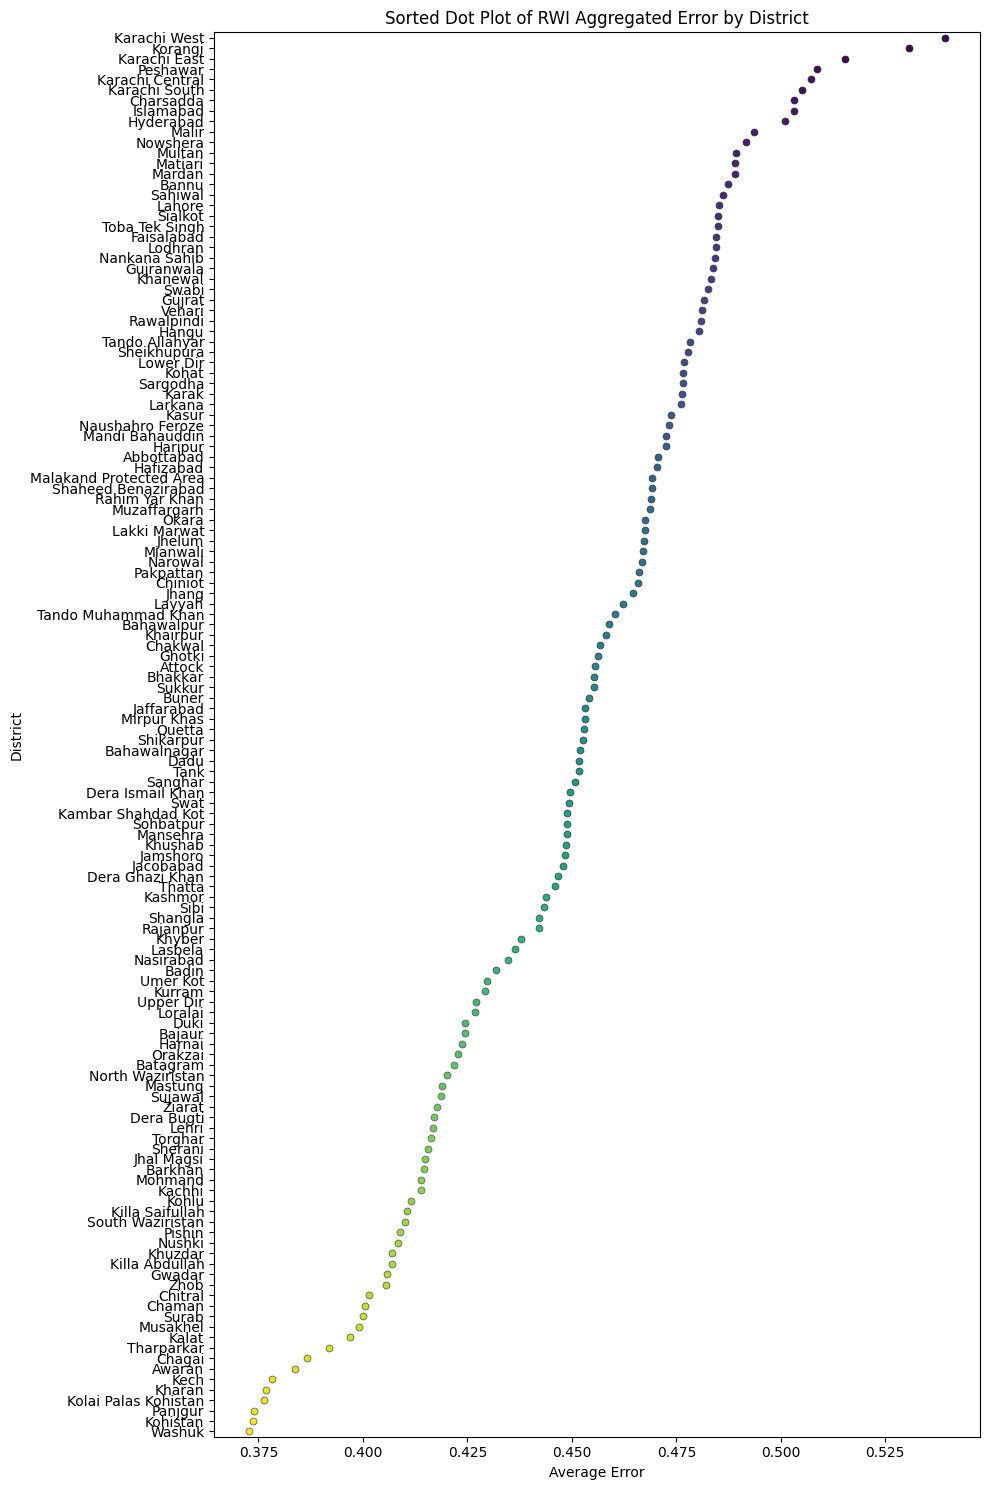

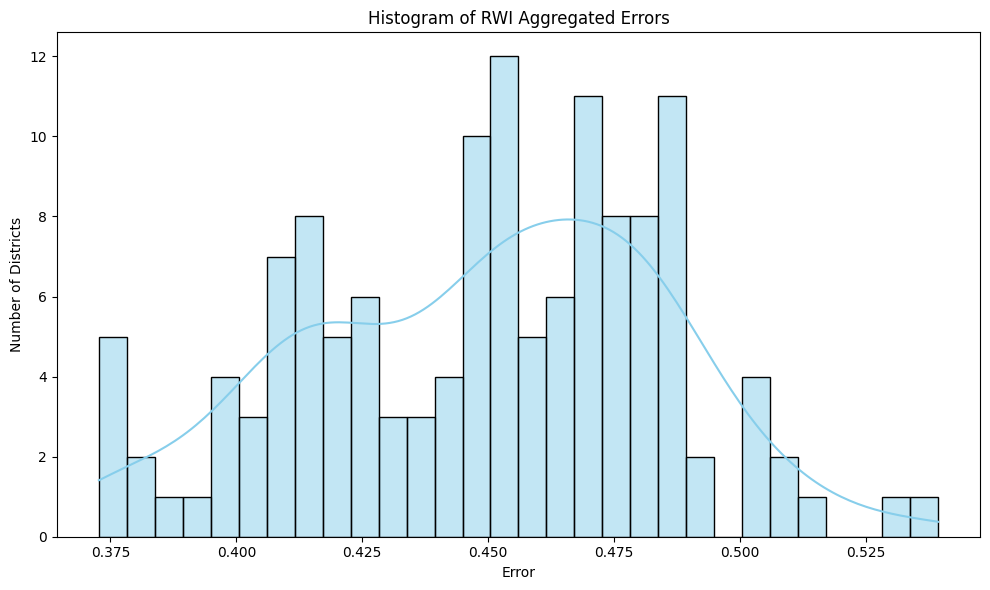

In [42]:
# Aggregate the error
agg_error = filtered_rwi_district_data.groupby('ADM2_EN')['error'].mean().reset_index().sort_values(by='error', ascending=False)

# Sorted Dot Plot
plt.figure(figsize=(10, 15))
sns.stripplot(data=agg_error, y='ADM2_EN', x='error', size=5, palette='viridis', jitter=False, linewidth=0.5)
plt.title('Sorted Dot Plot of RWI Aggregated Error by District')
plt.xlabel('Average Error')
plt.ylabel('District')
plt.tight_layout()
plt.show()

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(agg_error['error'], kde=True, bins=30, color='skyblue')
plt.title('Histogram of RWI Aggregated Errors')
plt.xlabel('Error')
plt.ylabel('Number of Districts')
plt.tight_layout()
plt.show()


In [43]:
# Merge the two datasets on the district names
combined_data1 = pslm_district_ranking1.merge(rwi_district_ranking1, left_on='District', right_on='ADM2_EN')

n_bootstrap_samples = 1000
correlation_samples1 = []

for _ in range(n_bootstrap_samples):
    # Randomly sample districts with replacement
    sample1 = combined_data1.sample(n=combined_data1.shape[0], replace=True)

    # Calculate the correlation for this resampled data
    corr1, _ = spearmanr(sample1['Harmonized_Wealth_Index1'], sample1['rwi'])
    correlation_samples1.append(corr1)

# Analyze bootstrap results
bootstrap_mean1 = np.mean(correlation_samples1)
bootstrap_std1 = np.std(correlation_samples1)
confidence_interval1 = np.percentile(correlation_samples1, [2.5, 97.5])

print(f"Bootstrap Mean Correlation: {bootstrap_mean1:.2f}")
print(f"Bootstrap Standard Deviation: {bootstrap_std1:.2f}")
print(f"95% Confidence Interval: ({confidence_interval1[0]:.2f}, {confidence_interval1[1]:.2f})")


Bootstrap Mean Correlation: 0.73
Bootstrap Standard Deviation: 0.05
95% Confidence Interval: (0.61, 0.82)


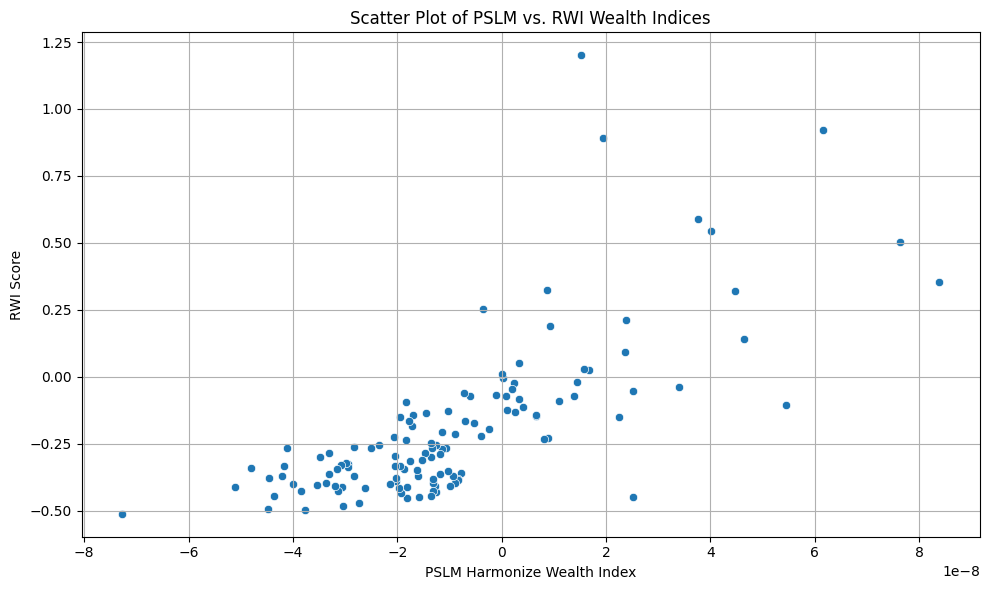

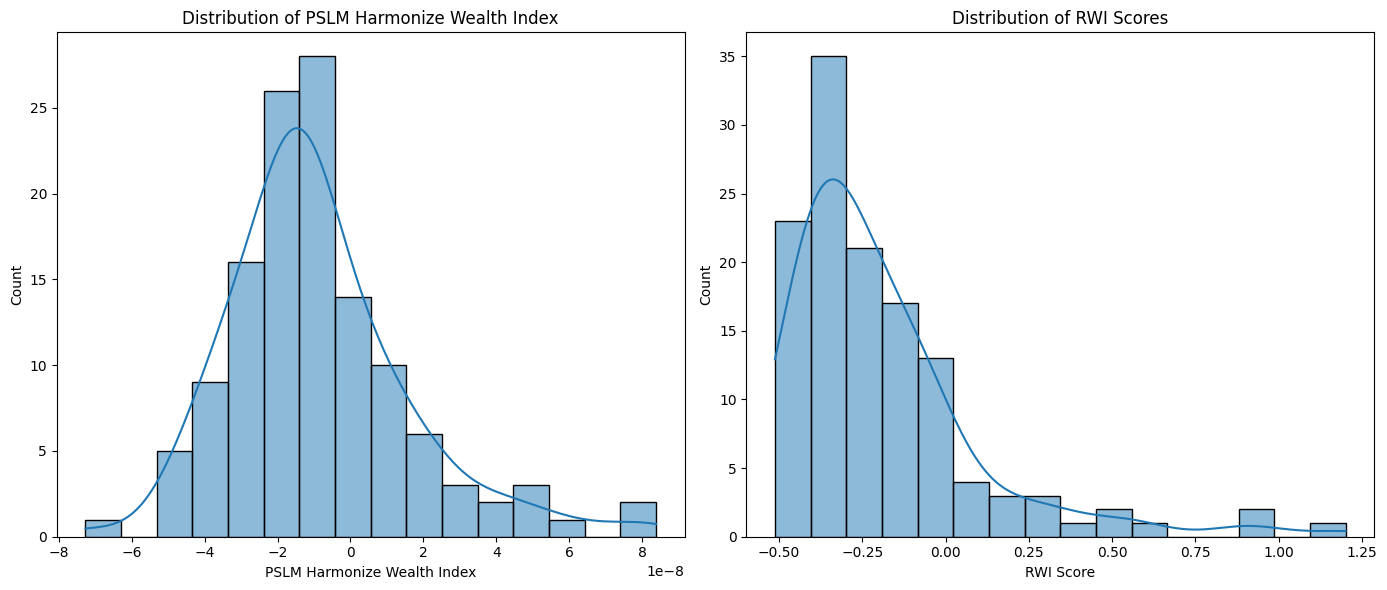

In [44]:

# Scatter plot of RWI vs PSLM scores
plt.figure(figsize=(10, 6))
sns.scatterplot(x=combined_data1['Harmonized_Wealth_Index1'], y=combined_data1['rwi'])
plt.title("Scatter Plot of PSLM vs. RWI Wealth Indices")
plt.xlabel("PSLM Harmonize Wealth Index")
plt.ylabel("RWI Score")
plt.grid(True)
plt.tight_layout()
plt.show()

# Histograms
plt.figure(figsize=(14, 6))

# PSLM histogram
plt.subplot(1, 2, 1)
sns.histplot(combined_data1['Harmonized_Wealth_Index1'], kde=True)
plt.title('Distribution of PSLM Harmonize Wealth Index')
plt.xlabel('PSLM Harmonize Wealth Index')
plt.ylabel('Count')

# RWI histogram
plt.subplot(1, 2, 2)
sns.histplot(combined_data['rwi'], kde=True)
plt.title('Distribution of RWI Scores')
plt.xlabel('RWI Score')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


## TASK 4: Leverage the higher resolution of the RWI: To what extent can be used for targeting of social programs?

<ipython-input-45-f6a48ca0ca1e>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sample_district_data['rwi'], shade=True)


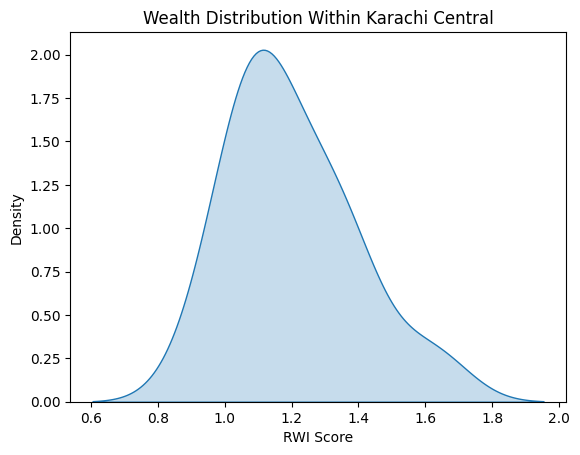

In [45]:
# 1. Wealth Distribution Within a Sample District (e.g., 'Karachi Central')
sample_district_data = filtered_rwi_district_data[filtered_rwi_district_data['ADM2_EN'] == 'Karachi Central']
sns.kdeplot(sample_district_data['rwi'], shade=True)
plt.title('Wealth Distribution Within Karachi Central')
plt.xlabel('RWI Score')
plt.show()


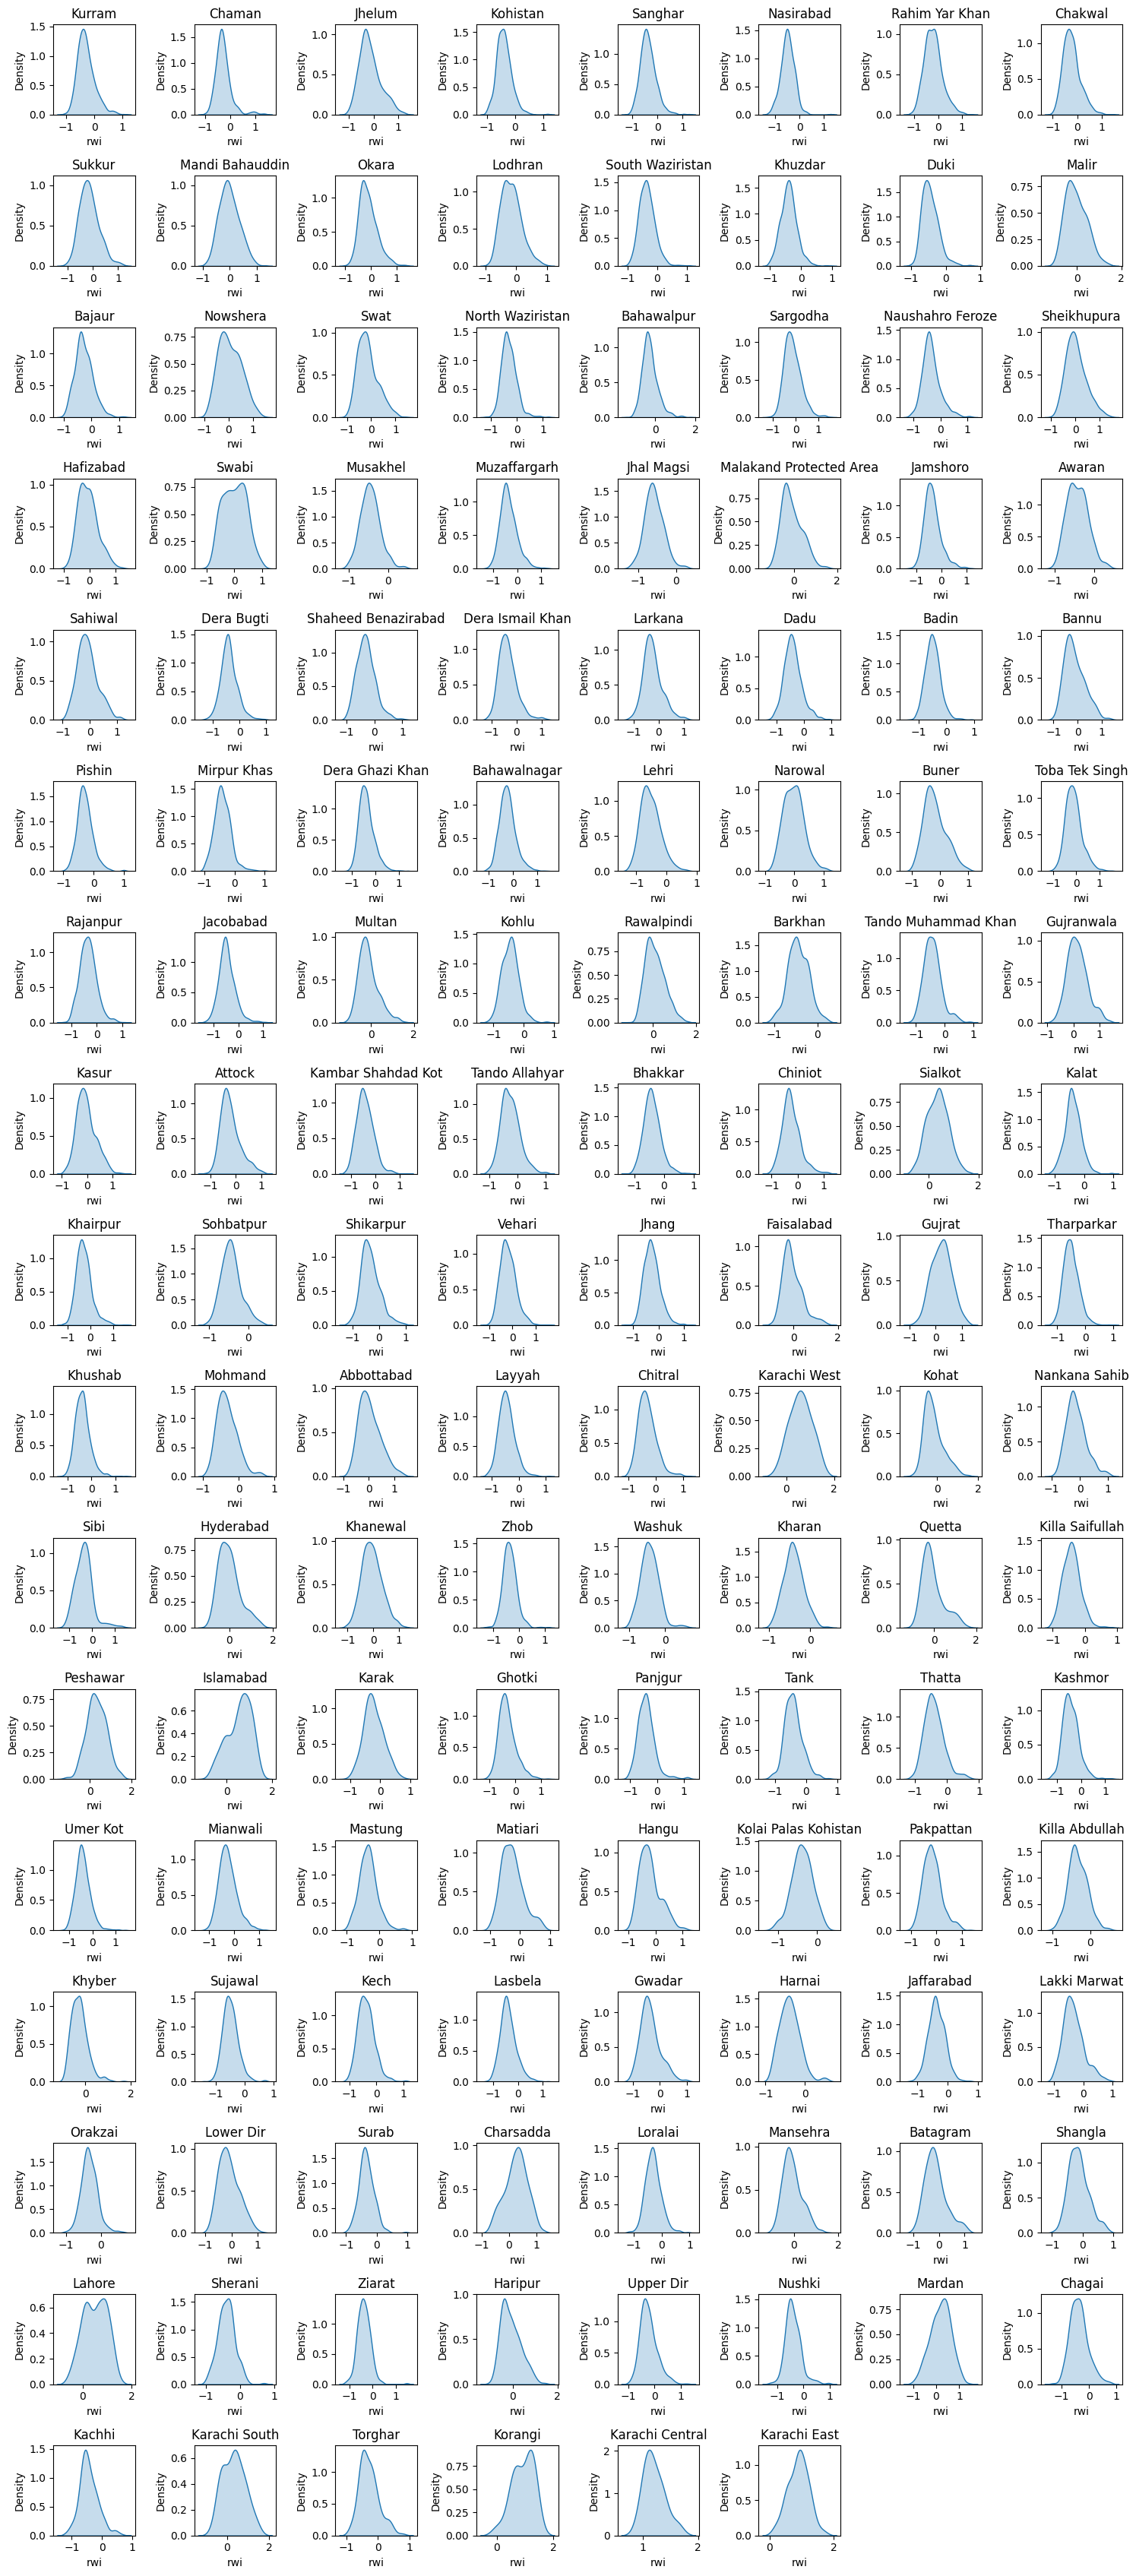

In [46]:
import math

num_districts_rwi = filtered_rwi_district_data['ADM2_EN'].nunique()

# Set subplot dimensions for RWI
num_cols_rwi = 8
num_rows_rwi = math.ceil(num_districts_rwi / num_cols_rwi)

plt.figure(figsize=(15, num_rows_rwi * 2))

for idx, district in enumerate(filtered_rwi_district_data['ADM2_EN'].unique()):
    plt.subplot(num_rows_rwi, num_cols_rwi, idx+1)
    district_data = filtered_rwi_district_data[filtered_rwi_district_data['ADM2_EN'] == district]
    sns.kdeplot(district_data['rwi'], fill=True)
    plt.title(district)
    plt.tight_layout()
    #plt.savefig(abspath_curr + '/data/plot.png')
plt.show()




In [47]:
rw_percentiles = filtered_rwi_district_data.groupby('ADM2_EN')['rwi'].quantile(0.10).reset_index()
rw_percentiles.rename(columns={'rwi': 'RWI_10th_Percentile'}, inplace=True)


In [48]:
pslm_percentiles = pslm_district_wealth.groupby('District')['Wealth_Index1'].quantile(0.10).reset_index()
pslm_percentiles.rename(columns={'Wealth_Index1': 'PSLM_10th_Percentile'}, inplace=True)


In [49]:
merged_percentiles = rw_percentiles.merge(pslm_percentiles, left_on='ADM2_EN', right_on='District', how='inner')
print(merged_percentiles)


          ADM2_EN  RWI_10th_Percentile      District  PSLM_10th_Percentile
0      Abbottabad              -0.4460    Abbottabad             17.970325
1          Attock              -0.6511        Attock             21.266512
2          Awaran              -0.7675        Awaran            -68.247991
3           Badin              -0.8270         Badin            -56.679161
4    Bahawalnagar              -0.6389  Bahawalnagar            -17.697220
..            ...                  ...           ...                   ...
121      Umer Kot              -0.7870      Umer Kot            -57.446587
122     Upper Dir              -0.5800     Upper Dir            -32.553664
123        Vehari              -0.6033        Vehari              6.250049
124        Washuk              -0.7284        Washuk            -59.361163
125        Ziarat              -0.6946        Ziarat            -58.299040

[126 rows x 4 columns]


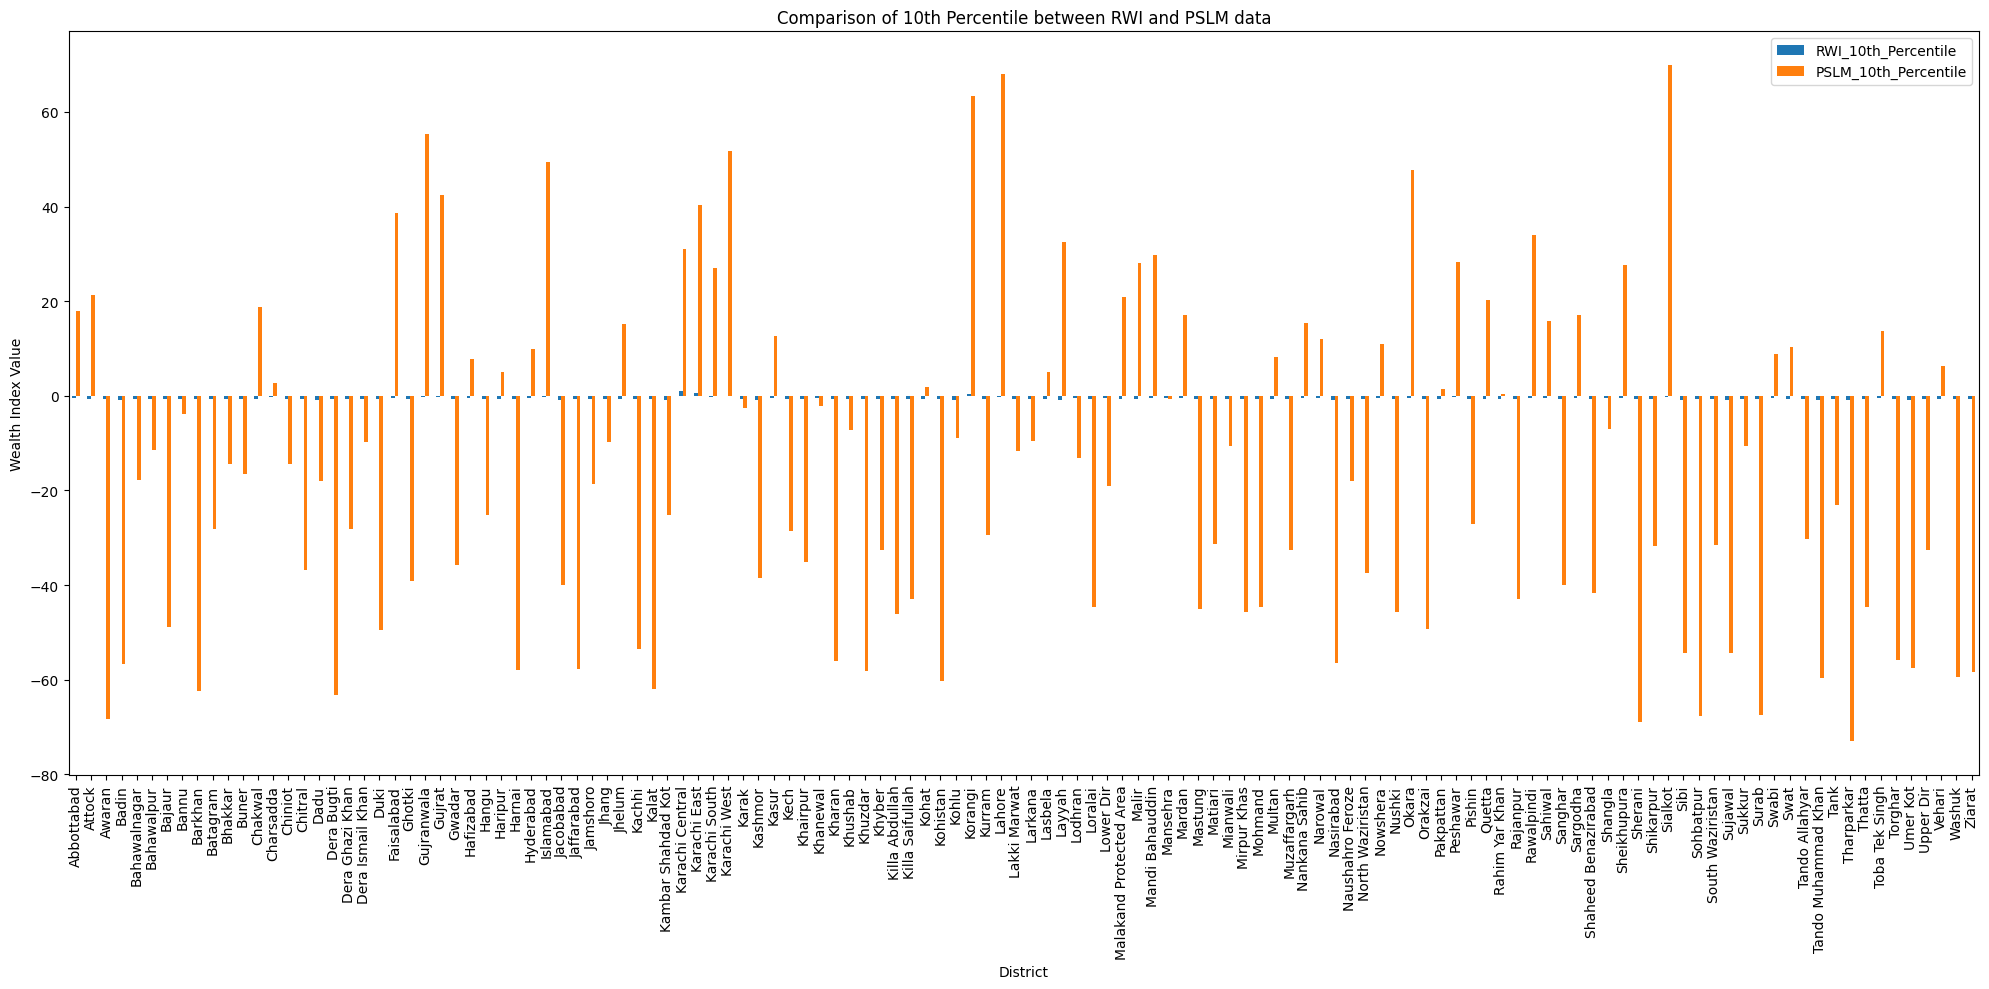

In [50]:
merged_percentiles.set_index('ADM2_EN').plot(kind='bar', figsize=(20,10))
plt.title('Comparison of 10th Percentile between RWI and PSLM data')
plt.ylabel('Wealth Index Value')
plt.xlabel('District')
plt.tight_layout()

#plt.savefig(abspath_curr + '/data/bar.png')

plt.show()


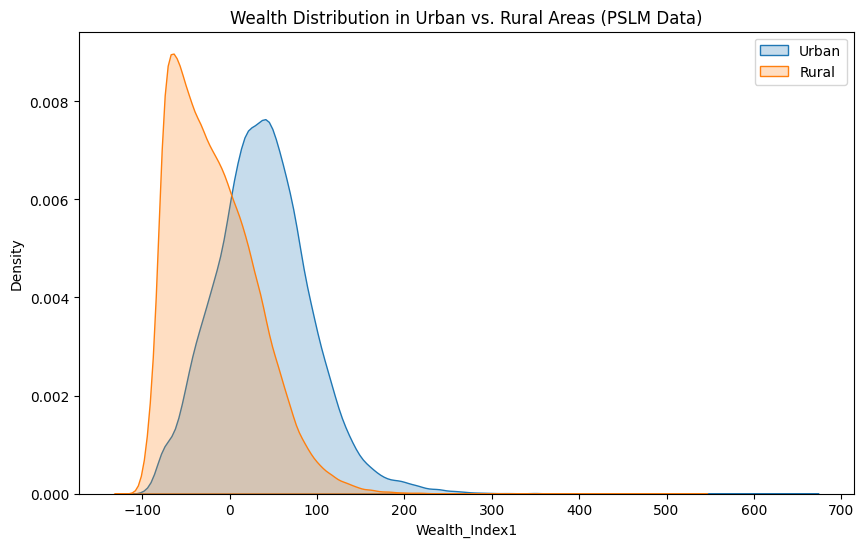

In [51]:
# Extracting urban and rural data subsets from the PSLM data
urban_data_pslm = pslm_data[pslm_data['rural'] == 'urban']
rural_data_pslm = pslm_data[pslm_data['rural'] == 'rural']

plt.figure(figsize=(10, 6))
sns.kdeplot(urban_data_pslm['Wealth_Index1'], fill=True, label='Urban')
sns.kdeplot(rural_data_pslm['Wealth_Index1'], fill=True, label='Rural')
plt.legend()
plt.title('Wealth Distribution in Urban vs. Rural Areas (PSLM Data)')
plt.show()

